In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
try:
    plt.style.use("jupyter")
except OSerror:
    print("Using default ploting style")

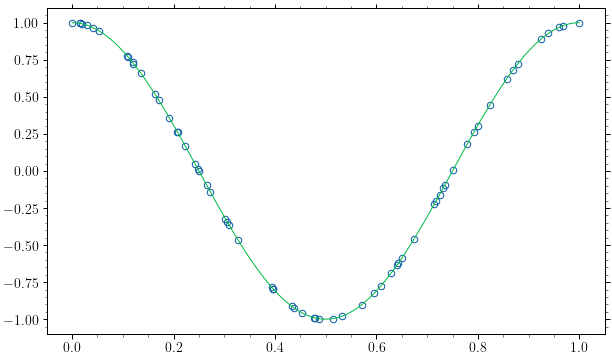

In [43]:
N = 64
x = np.sort(np.hstack([0,1,np.random.rand(N-2)]))
y = np.cos(2*np.pi*x)
plt.plot(x, y, 'o')
x_fine = np.linspace(0, 1, 512)
y_fine = np.cos(2*np.pi*x_fine)
plt.plot(x_fine, y_fine);

In [44]:
def set_IC(x):
    return np.ones_like(x)

In [45]:
u_n = set_IC(x)
u_n

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
def build_D_mat(i, x):
    D = np.zeros((2, 2))
    for j in range(2):
        h = x[i+1-2*j] - x[i]
        D[j,0] = h
        D[j,1] = 0.5*h**2
    return D

In [106]:
build_D_mat(3, x)

array([[ 9.55316134e-03,  4.56314458e-05],
       [-3.86251860e-03,  7.45952498e-06]])

In [102]:
def build_eta_vec(i, f):
    eta = np.zeros(2)
    for j in range(2):
        eta[j] = f[i+1-2*j] - f[i]
    return eta

In [108]:
build_eta_vec(3, y)

array([-0.00899779,  0.00262423])

In [103]:
def dfdx(x, f):
    dfdx = np.zeros_like(f)
    df2dx2 = np.zeros_like(f)
    for i in range(len(f)):
        if ((i==0) or (i==len(f)-1)):
            continue
        eta = build_eta_vec(i, f)
        D = build_D_mat(i, x)
        xi = linalg.solve(D, eta)
        dfdx[i] = xi[0]
        df2dx2[i] = xi[1]
    return dfdx, df2dx2

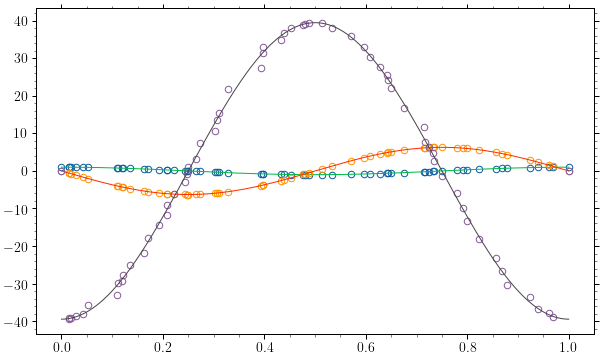

In [110]:
df, df2 = dfdx(x, y)
plt.plot(x, y, 'o')
plt.plot(x_fine, np.cos(2*np.pi*x_fine))
plt.plot(x, df, 'o')
plt.plot(x_fine, -2*np.pi*np.sin(2*np.pi*x_fine))
plt.plot(x, df2, 'o')
plt.plot(x_fine, -4*np.pi**2*np.cos(2*np.pi*x_fine));

Convergence